<a href="https://colab.research.google.com/github/JuanBarbosa277/Proyecto-Final-IA/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación por KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
 
data_set = pd.read_csv("citrus.csv")
 
 
 
 
Y_total = data_set.values[:,0];
 
 

Y_total[Y_total[:] == 'orange'] = 1
Y_total[Y_total[:] == 'grapefruit'] = 0
 
Y_total=Y_total.astype('int')
 
 
X_total = data_set.values[:, 1:5]
 
#Partición de datos --> 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X_total, Y_total, test_size=0.3, random_state=0)
 
#escalización de datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

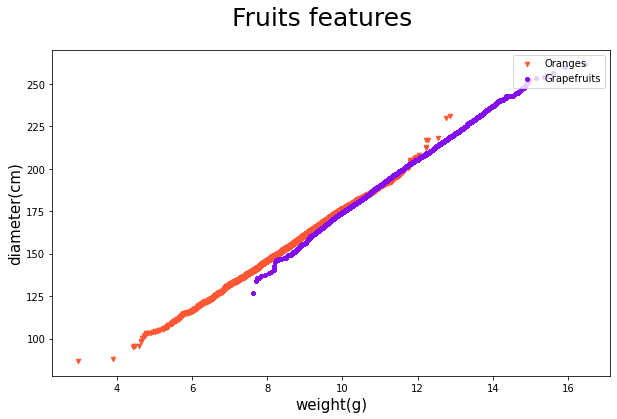

In [2]:
  
oranges_d=[]
oranges_w=[]

gfruits_d=[]
gfruits_w=[]
 
for i in np.arange(0,Y_total.size,1):
    if Y_total[i]==1:
        oranges_d.append(X_total[i,0])
        oranges_w.append(X_total[i,1])
    else:
        gfruits_d.append(X_total[i,0])
        gfruits_w.append(X_total[i,1])
         
fig = plt.figure(figsize=(10,6))
fig.suptitle('Fruits features', fontsize=25)
ax = fig.add_subplot(111)

no_of_preds = len(oranges_d) + len(gfruits_d)

ax.scatter(oranges_d,oranges_w, s=20, c='#FF5733', marker="v", label='Oranges')
ax.scatter(gfruits_d,gfruits_w, s=20, c='#830CF3', marker="P", label='Grapefruits')

  
plt.legend(loc='upper right');
  
ax.set_xlabel('weight(g)', fontsize=15)
ax.set_ylabel('diameter(cm)', fontsize=15)
  
plt.show()

máximo score = 0
hiperparámetro n neighbors= 1
hiperparámetro distance = 
[[1471   18]
 [  39 1472]]
---------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1489
           1       0.99      0.97      0.98      1511

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

matthews_corrcoef of logistic regresion on test set 96.20961385097235 %
Accuracy of logistic regresion on test set 98.1 %


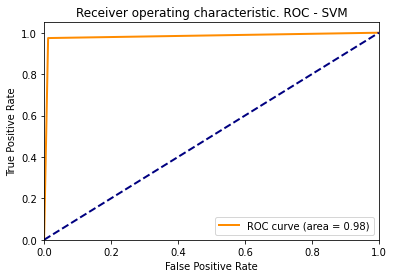

[[1471   18]
 [  39 1472]]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.metrics import roc_curve,roc_auc_score

# ver https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

distance=['euclidean', 'manhattan', 'chebyshev','minkowski','seuclidean', 'mahalanobis', 'hamming']
scores_prev = 0 #almacena el mejor score del modelo a medida que se itera
score_act = 0   #almacena el score del modelo en cada iteración
K_optimo=0       #almacena el valor del k óptimo
distancia_optima=""         #almacena la métrica distance óptima

max_k_range=math.sqrt(len(y_train))

k_range = range(1, int(max_k_range))


#Se busca el k y métrica de distancia que optimizan el modelo KNN
"""
for i in np.arange(len(distance)):
  for j in k_range:
    knn = KNeighborsClassifier(j,weights='uniform',metric=distance[i], metric_params=None,algorithm='brute')
    knn.fit(X_train, y_train)
    scores_act=knn.score(X_test, y_test)
    if scores_act > scores_prev:
      scores_prev=scores_act;
      k_optimo=j
      distancia_optima=distance[i]
"""
print("máximo score =",scores_prev)
print("hiperparámetro n neighbors=", k_optimo) 
print("hiperparámetro distance =", distancia_optima) 

#Se entrena nuevamente el modelo con los hiperparámetros óptimos hallados
knn = KNeighborsClassifier(1,weights='uniform',metric='mahalanobis', metric_params=None,algorithm='brute')
knn.fit(X_train, y_train)

#Matriz de confusión e informe de clasificación para evaluar el método
y_test_predicted_knn = knn.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted_knn))
print("---------------------------")
print(classification_report(y_test, y_test_predicted_knn))


#Cálculo de las métricas MCC y ACC
MCC = matthews_corrcoef(y_test, y_test_predicted_knn)
print("matthews_corrcoef of logistic regresion on test set", MCC*100,'%')
ACC = accuracy_score(y_test, y_test_predicted_knn)
print("Accuracy of logistic regresion on test set", ACC*100,'%')

y_test_scores=knn.predict_proba(X_test)

#Gráfica ROC
fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC - SVM')
plt.legend(loc="lower right")
plt.show()
print(confusion_matrix(y_test,y_test_predicted_knn))

